In [1]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, \
NthOrderBoundaryCondition, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer,PowerLawConvectionTerm,ImplicitSourceTerm
from fipy.tools import numerix
from fipy import DefaultSolver
import numpy as np
import math

In [2]:
L = 3.
T = 1.
nx = 1000
nt = 1000
dx = L/nx
mesh = Grid1D(nx=nx, dx=dx)

valueLeft = 1
valueRight = 0
timeStepDuration = T/nt
steps = nt

In [3]:
def K_(u):
    return np.full_like(u,1) + 0.5*u

In [4]:
phi = CellVariable(name="solution variable",
                   mesh=mesh,
                   value=0.)
BCs = (
    NthOrderBoundaryCondition(faces=mesh.facesLeft, value=-1, order=1),
    NthOrderBoundaryCondition(faces=mesh.facesRight, value=0, order=1)
    )

phi.faceGrad.constrain(-1/K_(phi.faceValue),where=mesh.facesLeft)
phi.faceGrad.constrain(0, where= mesh.facesRight)


eqX = (TransientTerm(coeff = 1)
      == DiffusionTerm(coeff=K_(phi)) )

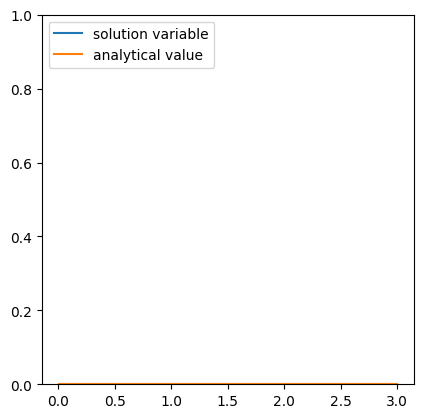

In [5]:
phiAnalytical = CellVariable(name="analytical value",
                             mesh=mesh)
if __name__ == '__main__':
    viewer = Viewer(vars=(phi, phiAnalytical),
                    datamin=0., datamax=1.)


In [6]:
x = mesh.cellCenters[0]

def solution(x,t,L,n_max):
    V = t/L + L/3
    for n in range(1,n_max+1):
        V+=-2*L/(math.pi**2*n**2)*np.exp(-math.pi**2*n**2*t/L**2)*np.cos(math.pi*n*x/L)
    return -2 + 2*np.sqrt(-x + x**2/(2*L) + 1 + V)

from builtins import range
solver = DefaultSolver()
for step in range(steps):
    phiAnalytical.setValue(solution(x,timeStepDuration*step,L,100)) 
    eqX.solve(var=phi,
              dt=timeStepDuration,
              #boundaryConditions = BCs,
              solver = solver)
    if __name__ == '__main__':
        viewer.plot()

KeyboardInterrupt: 